In [308]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
from scipy.optimize import curve_fit
from scipy.stats import linregress
from scipy.signal import find_peaks

In [309]:
# Capstone guidelines: https://bcourses.berkeley.edu/courses/1532916/pages/capstone-project-2?module_item_id=17001677

In [310]:
# load data
def file_name_voltage(number):
    return f"resources/data/{number}_voltage.csv"

def file_name_B_field(number):
    return f"resources/data/{number}_B_field.csv"

data0_1_table = np.genfromtxt(file_name_voltage(0.1), delimiter=',', skip_header=1)
data0_1= {
    "time": data0_1_table[:, 0],        # time, s
    "voltage": data0_1_table[:, 1],     # voltage, V
}

data0_2_table = np.genfromtxt(file_name_voltage(0.2), delimiter=',', skip_header=1)
data0_2= {
    "time": data0_2_table[:, 0],        # time, s
    "voltage": data0_2_table[:, 1],     # voltage, V
}

data1_1_B_table = np.genfromtxt(file_name_B_field(1.1), delimiter=',', skip_header=1)
data1_1_B= {
    "time": data1_1_B_table[:,0], # time, s
    "Bx": data1_1_B_table[:,1],   # Bx (µT)
    "By": data1_1_B_table[:,2],   # By (µT)
    "Bz": data1_1_B_table[:,3],   # Bz (µT)
}

data1_1_v_table = np.genfromtxt(file_name_voltage(1.1), delimiter=',', skip_header=1)
data1_1_v= {
    "time": data1_1_v_table[:, 0],        # time, s
    "voltage": data1_1_v_table[:, 1],     # voltage, V
}

data2_1_B_table = np.genfromtxt(file_name_B_field(2.1), delimiter=',', skip_header=1)
data2_1_B = {
    "time": data2_1_B_table[:, 0],  # time, s
    "Bx": data2_1_B_table[:, 1],    # Bx (µT)
    "By": data2_1_B_table[:, 2],    # By (µT)
    "Bz": data2_1_B_table[:, 3],    # Bz (µT)
}

data2_1_v_table = np.genfromtxt(file_name_voltage(2.1), delimiter=',', skip_header=1)
data2_1_v = {
    "time": data2_1_v_table[:, 0],        # time, s
    "voltage": data2_1_v_table[:, 1],     # voltage, V
}

data2_2_B_table = np.genfromtxt(file_name_B_field(2.2), delimiter=',', skip_header=1)
data2_2_B = {
    "time": data2_2_B_table[:, 0],  # time, s
    "Bx": data2_2_B_table[:, 1],    # Bx (µT)
    "By": data2_2_B_table[:, 2],    # By (µT)
    "Bz": data2_2_B_table[:, 3],    # Bz (µT)
}

data2_2_v_table = np.genfromtxt(file_name_voltage(2.2), delimiter=',', skip_header=1)
data2_2_v = {
    "time": data2_2_v_table[:, 0],        # time, s
    "voltage": data2_2_v_table[:, 1],     # voltage, V
}

data2_3_B_table = np.genfromtxt(file_name_B_field(2.3), delimiter=',', skip_header=1)
data2_3_B = {
    "time": data2_3_B_table[:, 0],  # time, s
    "Bx": data2_3_B_table[:, 1],    # Bx (µT)
    "By": data2_3_B_table[:, 2],    # By (µT)
    "Bz": data2_3_B_table[:, 3],    # Bz (µT)
}

data2_3_v_table = np.genfromtxt(file_name_voltage(2.3), delimiter=',', skip_header=1)
data2_3_v = {
    "time": data2_3_v_table[:, 0],        # time, s
    "voltage": data2_3_v_table[:, 1],     # voltage, V
}

data2_4_B_table = np.genfromtxt(file_name_B_field(2.4), delimiter=',', skip_header=1)
data2_4_B = {
    "time": data2_4_B_table[:, 0],  # time, s
    "Bx": data2_4_B_table[:, 1],    # Bx (µT)
    "By": data2_4_B_table[:, 2],    # By (µT)
    "Bz": data2_4_B_table[:, 3],    # Bz (µT)
}

data2_4_v_table = np.genfromtxt(file_name_voltage(2.4), delimiter=',', skip_header=1)
data2_4_v = {
    "time": data2_4_v_table[:, 0],        # time, s
    "voltage": data2_4_v_table[:, 1],     # voltage, V
}

def get_data_slice(data, begin_second, end_second):
    if begin_second < 1/200: begin_second = 1/200
    return {key: value[int(begin_second*200-1):int(end_second*200-1)] for key, value in data.items()}

In [311]:
# plotting functions

def plot_magnetic_field(data_B, label):
    plt.plot(data_B["time"], data_B["Bx"], label="Bx " + label)
    plt.plot(data_B["time"], data_B["By"], label="By " + label)
    plt.plot(data_B["time"], data_B["Bz"], label="Bz " + label)

def plot_voltage(data_v, label, alpha=1):
    plt.plot(data_v["time"], data_v["voltage"], label="Voltage " + label, alpha=alpha)

In [312]:
# part 0: calibration

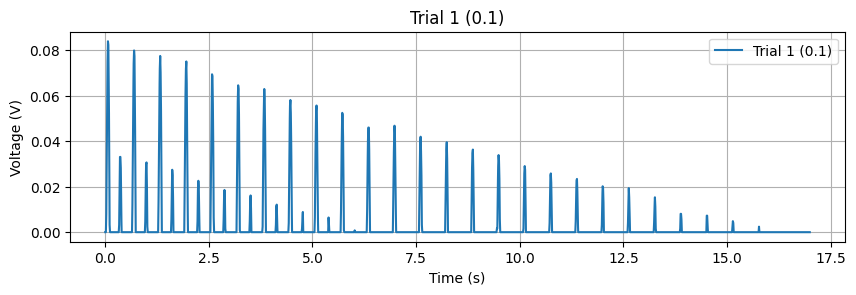

In [313]:
'''
110 grams plus magnet moving on spring (magnet = .013 g)
2 trials done - capstone test in Theo cloud (0.1, 0.2)
only induced voltage recorded
just using 1 magnet
P0T1.jpg
'''
def part_0_t_1():
    sliced_data0_1 = get_data_slice(data0_1, 0, 17)
    sliced_data0_2 = get_data_slice(data0_2, 2, 30)
    
    plt.figure(figsize=(10, 6))
    
    # Plot for trial 1 (0.1)
    plt.subplot(2, 1, 1)
    plt.plot(sliced_data0_1["time"], sliced_data0_1["voltage"], label="Trial 1 (0.1)")
    plt.xlabel('Time (s)')
    plt.ylabel('Voltage (V)')
    plt.title('Trial 1 (0.1)')
    plt.legend()
    plt.grid(True)
    
    # # Plot for trial 2 (0.2) - NOT AS GOOD, USE TRIAL 1
    # plt.subplot(2, 1, 2)
    # plt.plot(sliced_data0_2["time"], sliced_data0_2["voltage"], label="Trial 2 (0.2)")
    # plt.xlabel('Time (s)')
    # plt.ylabel('Voltage (V)')
    # plt.title('Trial 2 (0.2)')
    # plt.legend()
    # plt.grid(True)
    
    # plt.tight_layout()
    # plt.show()

# Call the function to plot the sliced data
part_0_t_1()

In [314]:
# part 1: analyze data for original solonoid, showing that the physics works for each variable change
# goal: fit the data to the equation V = -d(B)/dt and show that it is a good fit
# then find the strength of the magnet for each and average them to approximate the strength of the magnet

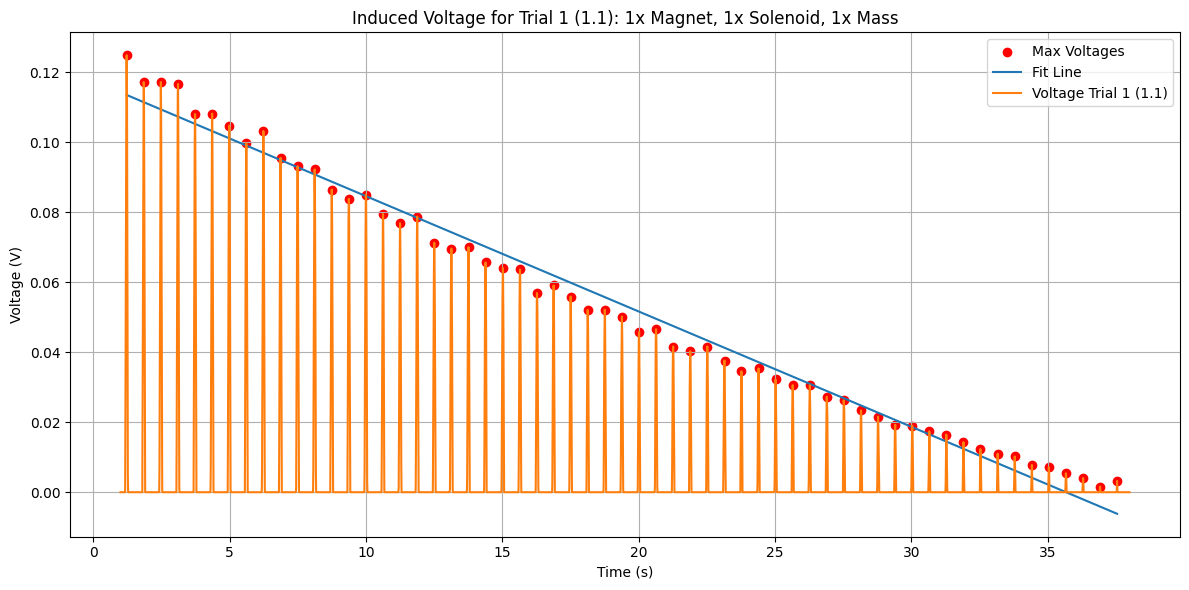

(-0.003297328844595797, 0.11760713607089587, array([ 1.22500002,  1.85000002,  2.48000002,  3.1099999 ,  3.7349999 ,
        4.36000013,  4.98500013,  5.61000013,  6.23999977,  6.86999989,
        7.49499989,  8.11999989,  8.74499989,  9.36999989, 10.        ,
       10.625     , 11.25      , 11.88000011, 12.50500011, 13.13000011,
       13.76000023, 14.38500023, 15.02000046, 15.64500046, 16.27000046,
       16.87999916, 17.50499916, 18.12999916, 18.75499916, 19.38500023,
       20.01499939, 20.63500023, 21.26499939, 21.88500023, 22.51499939,
       23.14500046, 23.76499939, 24.39500046, 25.01499939, 25.64500046,
       26.27499962, 26.89500046, 27.51499939, 28.14999962, 28.77499962,
       29.40500069, 30.02499962, 30.65500069, 31.27499962, 31.90500069,
       32.52500153, 33.15999985, 33.78499985, 34.41500092, 35.03499985,
       35.65999985, 36.29000092, 36.90999985, 37.54000092]), array([0.12490842, 0.11724303, 0.11726055, 0.11670117, 0.10810436,
       0.10823549, 0.10476191, 0.09

In [315]:
'''
Trial 1
110 grams plus magnet moving on spring (magnet = .013 g)
now figuring out best way to measure displacement - putting Iolab over magnet and measuring magnetometer which is proportional to displacement
Displacement in will cloud, induced voltage in Theo
1.1
P1T1.jpg
'''
def part_1_t_1():
    sliced_data1_1_B = get_data_slice(data1_1_B, 1, 38)
    sliced_data1_1_v = get_data_slice(data1_1_v, 1, 38)
    
    plt.figure(figsize=(12, 6))

    # Plot magnetic field data
    # plt.subplot(1, 2, 1)
    # plot_magnetic_field(sliced_data1_1_B, "Trial 1 (1.1)")
    # plt.xlabel('Time (s)')
    # plt.ylabel('Magnetic Field (µT)')
    # plt.title('Magnetic Field for Trial 1 (1.1)')
    # plt.legend()
    # plt.grid(True)


    #get the peaks of the induced voltage
    peaks, _ = find_peaks(sliced_data1_1_v["voltage"], distance=100)  # Adjust the distance as needed
    
    # Find and plot maximum points
    max_times = sliced_data1_1_v["time"][peaks]
    max_voltages = sliced_data1_1_v["voltage"][peaks]
    plt.scatter(max_times, max_voltages, color='red', label='Max Voltages')
    
    #fit the maximum points to a line
    slope, intercept, r_value, p_value, std_err = linregress(max_times, max_voltages)
    fit_line = slope * max_times + intercept
    plt.plot(max_times, fit_line, label='Fit Line')



    # Plot induced voltage data
    # plt.subplot(1, 2, 2)
    plot_voltage(sliced_data1_1_v, "Trial 1 (1.1)")
    plt.xlabel('Time (s)')
    plt.ylabel('Voltage (V)')
    plt.title('Induced Voltage for Trial 1 (1.1): 1x Magnet, 1x Solenoid, 1x Mass')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()
    
    return slope, intercept, max_times, max_voltages

# Call the function to plot the sliced data
t1fit = part_1_t_1()
print(t1fit)

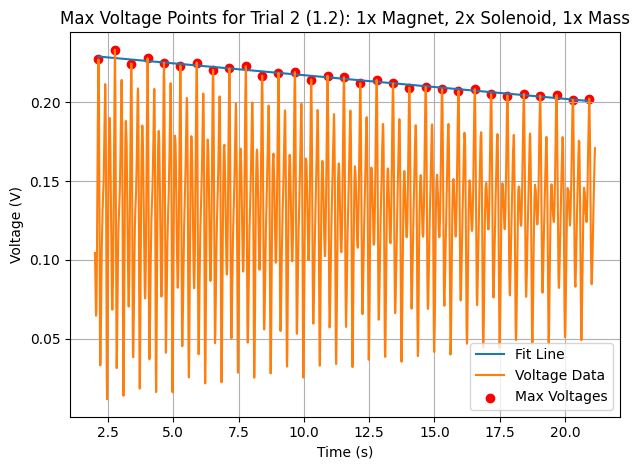

In [316]:
'''
Trial 2
2 solenoids
110 grams plus magnet moving on spring (magnet = .013 g)
Displacement in will cloud, induced voltage in Theo
2.1
P1T2.jpg
'''
def part_1_t_2():
    sliced_data2_1_B = get_data_slice(data2_1_B, 2, data2_1_B["time"][-1])
    sliced_data2_1_v = get_data_slice(data2_1_v, 2, data2_1_v["time"][-1])
    
    # plt.figure(figsize=(12, 6))

    # # Plot induced voltage data
    # plt.subplot(1, 2, 1)
    # plot_voltage(sliced_data2_1_v, "Trial 2 (2.1)")
    # plt.xlabel('Time (s)')
    # plt.ylabel('Voltage (V)')
    # plt.title('Induced Voltage for Trial 2 (2.1)')
    # plt.legend()
    # plt.grid(True)

    # Find and plot maximum points
    peaks, _ = find_peaks(sliced_data2_1_v["voltage"], distance=100)  # Adjust the distance as needed
    max_times = sliced_data2_1_v["time"][peaks]
    max_voltages = sliced_data2_1_v["voltage"][peaks]
    
    #fit the maximum points to a line
    slope, intercept, r_value, p_value, std_err = linregress(max_times, max_voltages)
    fit_line = slope * max_times + intercept
    plt.plot(max_times, fit_line, label='Fit Line')
    

    # plt.subplot(1, 2, 2)
    plt.plot(sliced_data2_1_v["time"], sliced_data2_1_v["voltage"], label='Voltage Data')
    plt.scatter(max_times, max_voltages, color='red', label='Max Voltages')
    plt.xlabel('Time (s)')
    plt.ylabel('Voltage (V)')
    plt.title('Max Voltage Points for Trial 2 (1.2): 1x Magnet, 2x Solenoid, 1x Mass')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()
    
    return slope, intercept, max_times, max_voltages

# Call the function to plot the sliced data with max values
t2fit = part_1_t_2()

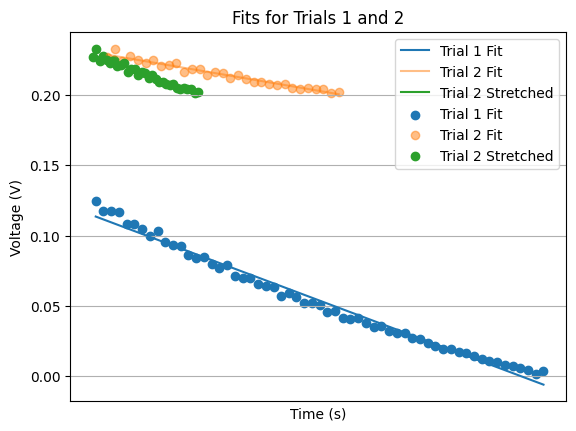

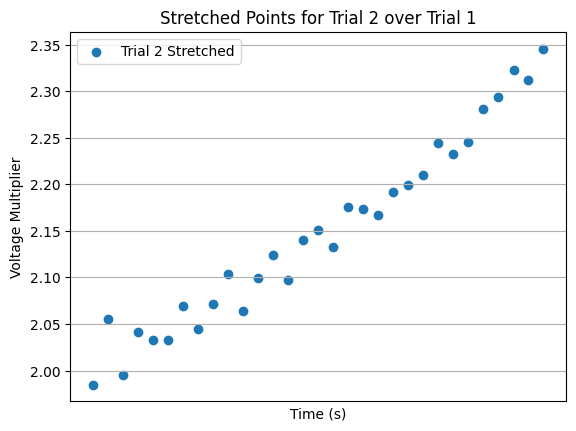

In [317]:
#plot the two fits
plt.plot(t1fit[2], t1fit[1] + t1fit[0] * t1fit[2], label='Trial 1 Fit')
plt.plot(t2fit[2], t2fit[1] + t2fit[0] * t2fit[2], label='Trial 2 Fit', alpha=0.5)
plt.plot(t2fit[2] * t2fit[0]/t1fit[0], t2fit[1] + t2fit[0] * t2fit[2], label='Trial 2 Stretched',)

#scatter the first fit
plt.scatter(t1fit[2], t1fit[3], label='Trial 1 Fit')
#scatter the second fit with alpha = 0.5
plt.scatter(t2fit[2], t2fit[3], label='Trial 2 Fit', alpha=0.5)
#scatter the second fit stretched so that the slopes are the same
plt.scatter(t2fit[2] * t2fit[0]/t1fit[0], t2fit[3], label='Trial 2 Stretched')

plt.xlabel('Time (s)')
#hide x numbers
plt.gca().axes.get_xaxis().set_ticks([])
plt.ylabel('Voltage (V)')
plt.title('Fits for Trials 1 and 2')
plt.legend()
plt.grid(True)
plt.show()

# plot the stretched points over the first fit
multiplyinator = lambda v, i: t2fit[3][i] / (t1fit[1] + t1fit[0] * (v * t2fit[0]/t1fit[0]))
t2_over = multiplyinator(t2fit[2], np.arange(len(t2fit[2])))
plt.scatter(t2fit[2] * t2fit[0]/t1fit[0], t2_over, label='Trial 2 Stretched')
plt.xlabel('Time (s)')
plt.gca().axes.get_xaxis().set_ticks([])
plt.ylabel('Voltage Multiplier')
plt.title('Stretched Points for Trial 2 over Trial 1')
plt.legend()
plt.grid(True)
plt.show()


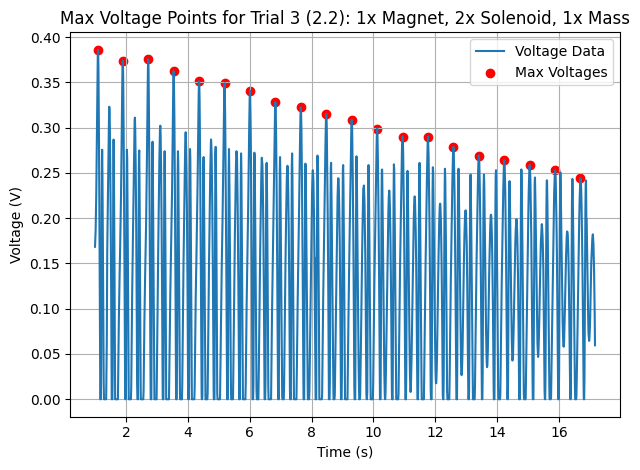

In [318]:
'''
Trial 3
same as trial 2, but moved the iolab up so no longer starts in solonoid
2.2
P1T3_4_5.jpg
'''
def part_1_t_3():
    sliced_data2_2_B = get_data_slice(data2_2_B, 1, data2_2_B["time"][-1])
    sliced_data2_2_v = get_data_slice(data2_2_v, 1, data2_2_v["time"][-1])
    
    # plt.figure(figsize=(12, 6))
    # 
    # # Plot induced voltage data
    # plt.subplot(1, 2, 2)
    # plot_voltage(sliced_data2_2_v, "Trial 3 (2.2)")
    # plt.xlabel('Time (s)')
    # plt.ylabel('Voltage (V)')
    # plt.title('Induced Voltage for Trial 3 (2.2)')
    # plt.legend()
    # plt.grid(True)

    # Find and plot maximum points
    peaks, _ = find_peaks(sliced_data2_2_v["voltage"], distance=100)  # Adjust the distance as needed
    max_times = sliced_data2_2_v["time"][peaks]
    max_voltages = sliced_data2_2_v["voltage"][peaks]
    
    #fit the maximum points to a line
    slope, intercept, r_value, p_value, std_err = linregress(max_times, max_voltages)

    # plt.subplot(1, 2, 1)
    plt.plot(sliced_data2_2_v["time"], sliced_data2_2_v["voltage"], label='Voltage Data')
    plt.scatter(max_times, max_voltages, color='red', label='Max Voltages')
    plt.xlabel('Time (s)')
    plt.ylabel('Voltage (V)')
    plt.title('Max Voltage Points for Trial 3 (2.2): 1x Magnet, 2x Solenoid, 1x Mass')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()
    
    return slope, intercept, max_times, max_voltages

# Call the function to plot the sliced data with max values
t3fit = part_1_t_3()

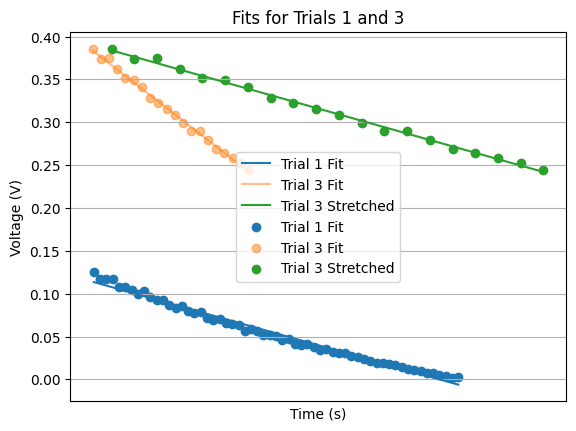

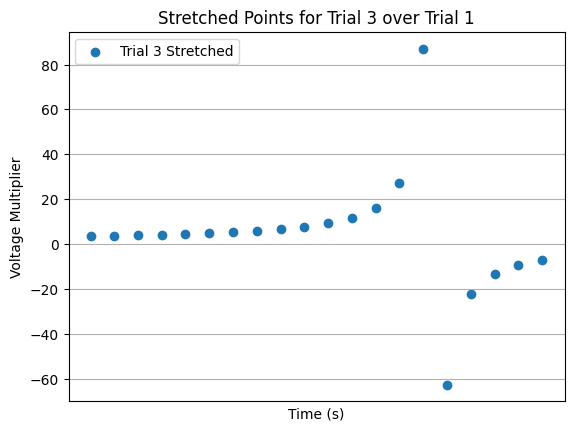

In [319]:
#plot the two fits
plt.plot(t1fit[2], t1fit[1] + t1fit[0] * t1fit[2], label='Trial 1 Fit')
plt.plot(t3fit[2], t3fit[1] + t3fit[0] * t3fit[2], label='Trial 3 Fit', alpha=0.5)
plt.plot(t3fit[2] * t3fit[0]/t1fit[0], t3fit[1] + t3fit[0] * t3fit[2], label='Trial 3 Stretched',)
plt.scatter(t1fit[2], t1fit[3], label='Trial 1 Fit')
plt.scatter(t3fit[2], t3fit[3], label='Trial 3 Fit', alpha=0.5)
plt.scatter(t3fit[2] * t3fit[0]/t1fit[0], t3fit[3], label='Trial 3 Stretched')
plt.xlabel('Time (s)')
plt.gca().axes.get_xaxis().set_ticks([])
plt.ylabel('Voltage (V)')
plt.title('Fits for Trials 1 and 3')
plt.legend()
plt.grid(True)
plt.show()

# plot the stretched points over the first fit
multiplyinator = lambda v, i: t3fit[3][i] / (t1fit[1] + t1fit[0] * (v * t3fit[0]/t1fit[0]))
t3_over = multiplyinator(t3fit[2], np.arange(len(t3fit[2])))
plt.scatter(t3fit[2] * t3fit[0]/t1fit[0], t3_over, label='Trial 3 Stretched')
plt.xlabel('Time (s)')
plt.gca().axes.get_xaxis().set_ticks([])
plt.ylabel('Voltage Multiplier')
plt.title('Stretched Points for Trial 3 over Trial 1')
plt.legend()
plt.grid(True)
plt.show()



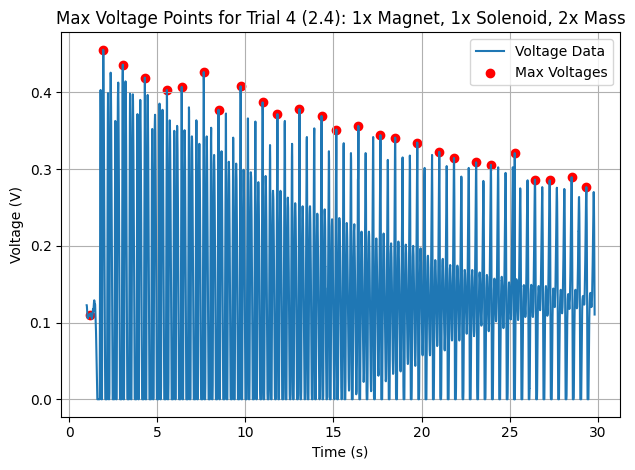

In [320]:
'''
Trial 4
Same as trial 3 but 230 grams plus magnet
2.3
P1T3_4_5.jpg
'''
def part_1_t_4():
    sliced_data2_4_B = get_data_slice(data2_4_B, 1, data2_4_B["time"][-1])
    sliced_data2_4_v = get_data_slice(data2_4_v, 1, data2_4_v["time"][-1])
    
    # plt.figure(figsize=(12, 6))
    # 
    # # Plot induced voltage data
    # plt.subplot(1, 2, 2)
    # plot_voltage(sliced_data2_3_v, "Trial 4 (2.3)")
    # plt.xlabel('Time (s)')
    # plt.ylabel('Voltage (V)')
    # plt.title('Induced Voltage for Trial 4 (2.3)')
    # plt.legend()
    # plt.grid(True)

    # Find and plot maximum points
    peaks, _ = find_peaks(sliced_data2_4_v["voltage"], distance=150)  # Adjust the distance as needed
    max_times = sliced_data2_4_v["time"][peaks]
    max_voltages = sliced_data2_4_v["voltage"][peaks]
    
    #fit the maximum points to a line
    slope, intercept, r_value, p_value, std_err = linregress(max_times, max_voltages)

    # plt.subplot(1, 2, 1)
    plt.plot(sliced_data2_4_v["time"], sliced_data2_4_v["voltage"], label='Voltage Data')
    plt.scatter(max_times, max_voltages, color='red', label='Max Voltages')
    plt.xlabel('Time (s)')
    plt.ylabel('Voltage (V)')
    plt.title('Max Voltage Points for Trial 4 (2.4): 1x Magnet, 1x Solenoid, 2x Mass')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()
    
    return slope, intercept, max_times, max_voltages

# Call the function to plot the sliced data with max values
t4fit = part_1_t_4()

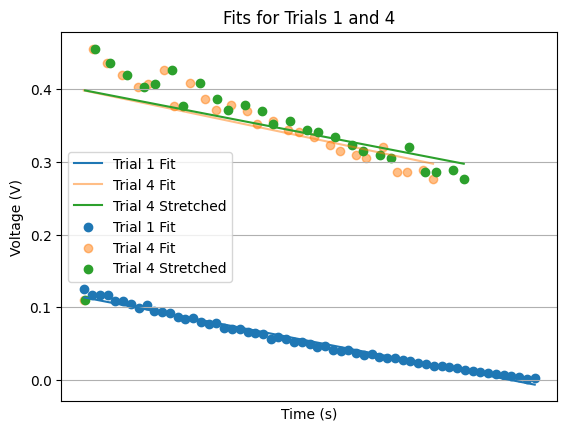

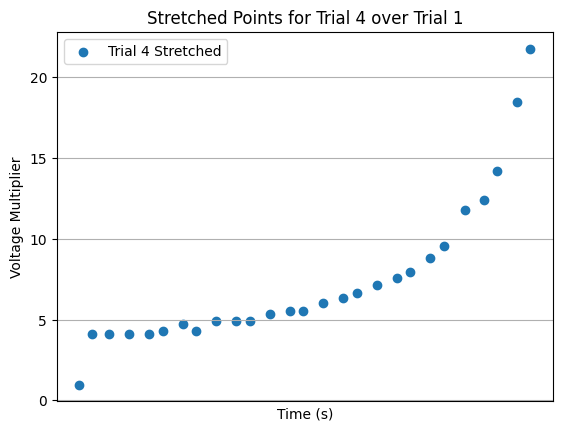

In [321]:
#plot the two fits
plt.plot(t1fit[2], t1fit[1] + t1fit[0] * t1fit[2], label='Trial 1 Fit')
plt.plot(t4fit[2], t4fit[1] + t4fit[0] * t4fit[2], label='Trial 4 Fit', alpha=0.5)
plt.plot(t4fit[2] * t4fit[0]/t1fit[0], t4fit[1] + t4fit[0] * t4fit[2], label='Trial 4 Stretched',)
plt.scatter(t1fit[2], t1fit[3], label='Trial 1 Fit')
plt.scatter(t4fit[2], t4fit[3], label='Trial 4 Fit', alpha=0.5)
plt.scatter(t4fit[2] * t4fit[0]/t1fit[0], t4fit[3], label='Trial 4 Stretched')
plt.xlabel('Time (s)')
plt.gca().axes.get_xaxis().set_ticks([])
plt.ylabel('Voltage (V)')
plt.title('Fits for Trials 1 and 4')
plt.legend()
plt.grid(True)
plt.show()

# plot the stretched points over the first fit
multiplyinator = lambda v, i: t4fit[3][i] / (t1fit[1] + t1fit[0] * (v * t4fit[0]/t1fit[0]))
t4_over = multiplyinator(t4fit[2], np.arange(len(t4fit[2])))
plt.scatter(t4fit[2] * t4fit[0]/t1fit[0], t4_over, label='Trial 4 Stretched')
plt.xlabel('Time (s)')
plt.gca().axes.get_xaxis().set_ticks([])
plt.ylabel('Voltage Multiplier')
plt.title('Stretched Points for Trial 4 over Trial 1')
plt.legend()
plt.grid(True)
plt.show()


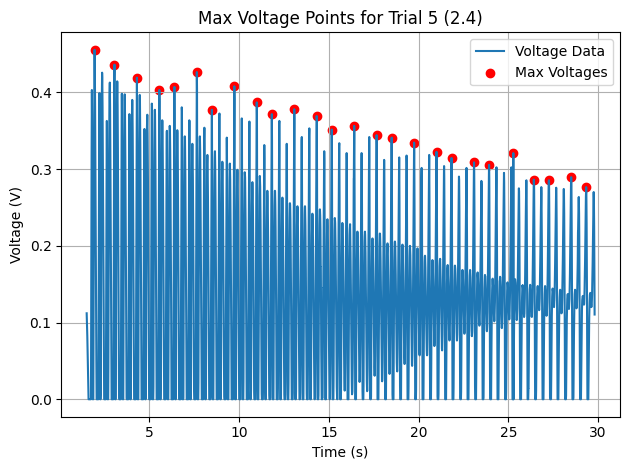

In [322]:
'''
Trial 5
same as trial 4 but magnet strength = more (more magnets)
Using 2 magnets
2.4
P1T3_4_5.jpg
'''
def part_1_t_5():
    sliced_data2_4_B = get_data_slice(data2_4_B, 1.5, data2_4_B["time"][-1])
    sliced_data2_4_v = get_data_slice(data2_4_v, 1.5, data2_4_v["time"][-1])
    
    # plt.figure(figsize=(12, 6))
    # 
    # # Plot induced voltage data
    # plt.subplot(1, 2, 2)
    # plot_voltage(sliced_data2_4_v, "Trial 5 (2.4)")
    # plt.xlabel('Time (s)')
    # plt.ylabel('Voltage (V)')
    # plt.title('Induced Voltage for Trial 5 (2.4)')
    # plt.legend()
    # plt.grid(True)

    # Find and plot maximum points
    peaks, _ = find_peaks(sliced_data2_4_v["voltage"], distance=125)  # Adjust the distance as needed
    max_times = sliced_data2_4_v["time"][peaks]
    max_voltages = sliced_data2_4_v["voltage"][peaks]

    # plt.subplot(1, 2, 1)
    plt.plot(sliced_data2_4_v["time"], sliced_data2_4_v["voltage"], label='Voltage Data')
    plt.scatter(max_times, max_voltages, color='red', label='Max Voltages')
    plt.xlabel('Time (s)')
    plt.ylabel('Voltage (V)')
    plt.title('Max Voltage Points for Trial 5 (2.4)')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Call the function to plot the sliced data with max values
part_1_t_5()

In [323]:
# part 2: create 2 solenoids, different radii
# goal: show that emf is proportional to radius squared when radius is changed, use previously found magnet strength


# one using gatorade bottle, other using mints jar
# 3.1 is WCT, 4.1 is gatorade

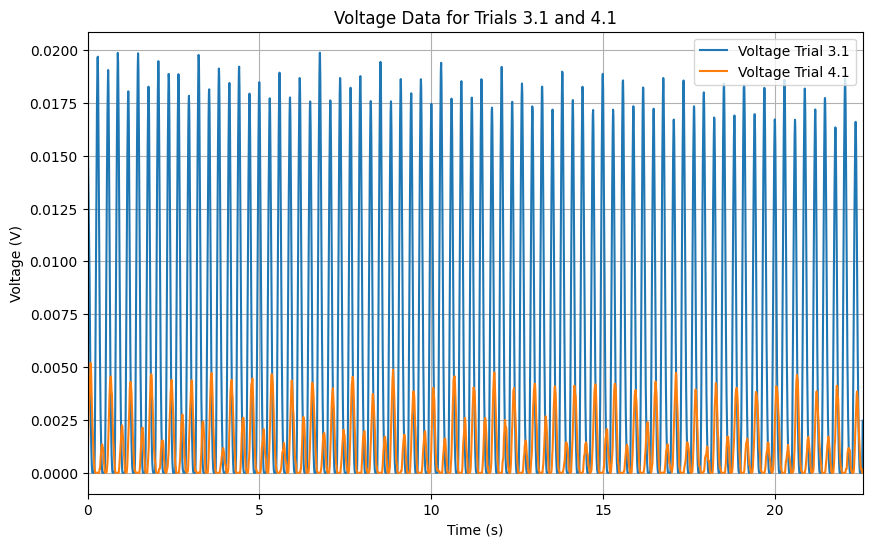

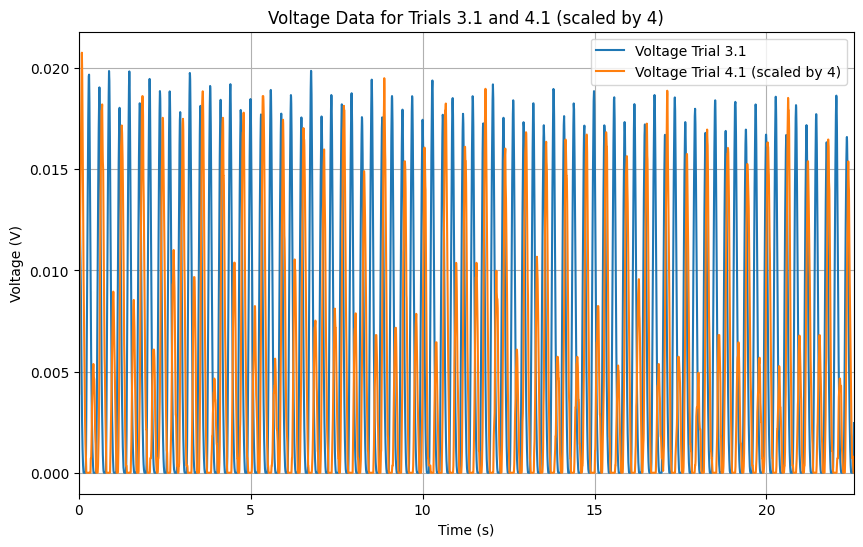

In [324]:
data3_1_v_table = np.genfromtxt(file_name_voltage(3.1), delimiter=',', skip_header=1)
data3_1_v= {
    "time": data3_1_v_table[:, 0],        # time, s
    "voltage": data3_1_v_table[:, 1],     # voltage, V
}

data4_1_v_table = np.genfromtxt(file_name_voltage(4.1), delimiter=',', skip_header=1)
data4_1_v= {
    "time": data4_1_v_table[:, 0],        # time, s
    "voltage": data4_1_v_table[:, 1],     # voltage, V
}

def part_2():
    plt.figure(figsize=(10, 6))

    # Plot voltage data for Trial 3.1
    plot_voltage(data3_1_v, "Trial 3.1")

    # Plot voltage data for Trial 4.1
    plot_voltage(data4_1_v, "Trial 4.1")

    plt.xlabel('Time (s)')
    plt.ylabel('Voltage (V)')
    plt.title('Voltage Data for Trials 3.1 and 4.1')
    plt.legend()
    plt.grid(True)
    plt.xlim(0, max(data4_1_v["time"]))  # Set x-axis limit from 0 to the end of Trial 4.1
    plt.show()

    plt.figure(figsize=(10, 6))

    # Plot voltage data for Trial 3.1
    plot_voltage(data3_1_v, "Trial 3.1")

    # Plot voltage data for Trial 4.1 (scaled by 4)
    scaled_data4_1_v = data4_1_v.copy()  # Make a copy of the data
    scaled_data4_1_v["voltage"] *= 4  # Scale the voltage by 4
    plot_voltage(scaled_data4_1_v, "Trial 4.1 (scaled by 4)")

    plt.xlabel('Time (s)')
    plt.ylabel('Voltage (V)')
    plt.title('Voltage Data for Trials 3.1 and 4.1 (scaled by 4)')
    plt.legend()
    plt.grid(True)
    plt.xlim(0, max(data4_1_v["time"]))  # Set x-axis limit from 0 to the end of Trial 4.1
    plt.show()

# Call the function to plot the voltage data for both cases
part_2()

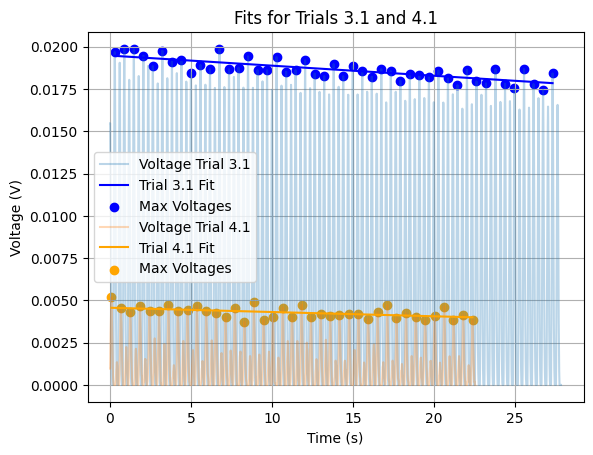

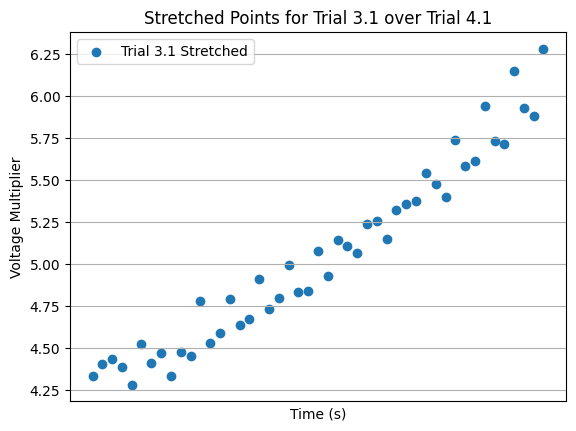

In [336]:
data4_1_v_table = np.genfromtxt(file_name_voltage(4.1), delimiter=',', skip_header=1)
data4_1_v= {
    "time": data4_1_v_table[:, 0],        # time, s
    "voltage": data4_1_v_table[:, 1],     # voltage, V
}

# analyse the peaks of the data
def part_2_2():
    plot_voltage(data3_1_v, "Trial 3.1", alpha=0.3)
    
    #find data 3.1 peaks
    peaks, _ = find_peaks(data3_1_v["voltage"], distance=100)  # Adjust the distance as needed
    max_times = data3_1_v["time"][peaks]
    max_voltages = data3_1_v["voltage"][peaks]
    
    #fit the maximum points to a line
    slope, intercept, r_value, p_value, std_err = linregress(max_times, max_voltages)
    fit_line = slope * max_times + intercept
    plt.plot(max_times, fit_line, label='Trial 3.1 Fit', color="blue")
    
    plt.scatter(max_times, max_voltages, color='blue', label='Max Voltages')
    
    t3fit = slope, intercept, max_times, max_voltages
    
    #find data 4.1 peaks
    peaks, _ = find_peaks(data4_1_v["voltage"], distance=100)  # Adjust the distance as needed
    max_times = data4_1_v["time"][peaks]
    max_voltages = data4_1_v["voltage"][peaks]
    
    plot_voltage(data4_1_v, "Trial 4.1", alpha=0.3)
    
    #fit the maximum points to a line
    slope, intercept, r_value, p_value, std_err = linregress(max_times, max_voltages)
    fit_line = slope * max_times + intercept
    plt.plot(max_times, fit_line, label='Trial 4.1 Fit', color="orange")
    
    plt.scatter(max_times, max_voltages, color='orange', label='Max Voltages')
    
    t4fit = slope, intercept, max_times, max_voltages
    
    
    # #stretch the first fit to match the second
    # plt.plot(t3fit[2] * t3fit[0]/t4fit[0], t3fit[1] + t3fit[0] * t3fit[2], label='Trial 3.1 Stretched', color="blue")
    # plt.scatter(t3fit[2] * t3fit[0]/t4fit[0], t3fit[3], color='blue', label='Trial 3.1 Stretched')
    
    plt.xlabel('Time (s)')
    plt.ylabel('Voltage (V)')
    plt.title('Fits for Trials 3.1 and 4.1')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    
    #show the multiplicativeness
    multiplyinator = lambda v, i: t3fit[3][i] / (t4fit[1] + t4fit[0] * (v * t3fit[0]/t4fit[0]))
    t3_over = multiplyinator(t3fit[2], np.arange(len(t3fit[2])))
    plt.scatter(t3fit[2] * t3fit[0]/t4fit[0], t3_over, label='Trial 3.1 Stretched')
    plt.xlabel('Time (s)')
    plt.gca().axes.get_xaxis().set_ticks([])
    plt.ylabel('Voltage Multiplier')
    plt.title('Stretched Points for Trial 3.1 over Trial 4.1')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    
    
part_2_2()

In [326]:
# part 3: add a iron core (some ferromagnetic material) to the bottom half of the solenoid, increase self-inductance
# goal: discuss how to maximize emf, find how much the iron core increases the self-inductance
# emf = L * di/dt

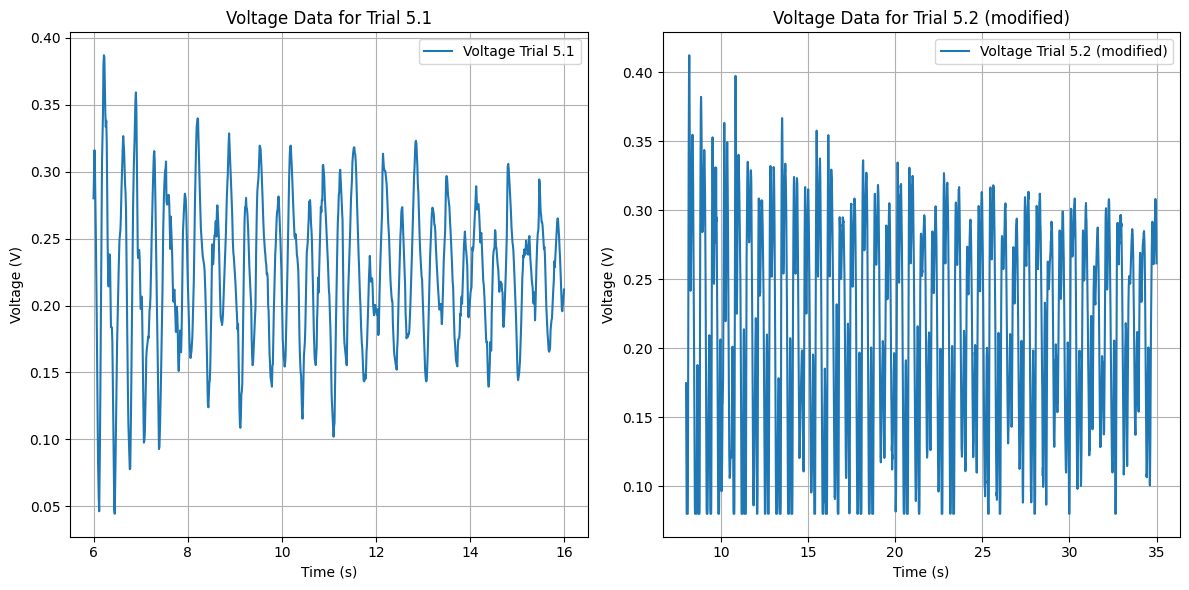

In [327]:
data5_1_v_table = np.genfromtxt(file_name_voltage(5.1), delimiter=',', skip_header=1)
data5_1_v= {
    "time": data5_1_v_table[:, 0],        # time, s
    "voltage": data5_1_v_table[:, 1],     # voltage, V
}

data5_2_v_table = np.genfromtxt(file_name_voltage(5.2), delimiter=',', skip_header=1)
data5_2_v= {
    "time": data5_2_v_table[:, 0],        # time, s
    "voltage": data5_2_v_table[:, 1],     # voltage, V
}

def part_3():
    # Get sliced data for Trial 5.1
    sliced_data5_1_v = get_data_slice(data5_1_v, 6, 16)
    
    # Get sliced data for Trial 5.2 and add 0.1 to the voltage
    sliced_data5_2_v = get_data_slice(data5_2_v, 8, 35)
    modified_sliced_data5_2_v = sliced_data5_2_v.copy()
    modified_sliced_data5_2_v["voltage"] += 0.08
    
    # Plot both voltage data next to each other
    plt.figure(figsize=(12, 6))

    # Plot voltage data for Trial 5.1
    plt.subplot(1, 2, 1)
    plot_voltage(sliced_data5_1_v, "Trial 5.1")
    plt.xlabel('Time (s)')
    plt.ylabel('Voltage (V)')
    plt.title('Voltage Data for Trial 5.1')
    plt.legend()
    plt.grid(True)

    # Plot voltage data for Trial 5.2
    plt.subplot(1, 2, 2)
    plot_voltage(modified_sliced_data5_2_v, "Trial 5.2 (modified)")
    plt.xlabel('Time (s)')
    plt.ylabel('Voltage (V)')
    plt.title('Voltage Data for Trial 5.2 (modified)')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Call the function to plot the sliced data
part_3()